# CELL 1: MOUNT DRIVE & SETUP

In [3]:
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

# Set working directory
os.chdir('/content/drive/My Drive/resp-rr-estimation')
print("Current directory:", os.getcwd())


Mounted at /content/drive
Current directory: /content/drive/My Drive/resp-rr-estimation


# CELL 2: INSTALL DEPENDENCIES

In [4]:
!pip install -q opencv-python torch torchvision scikit-learn tqdm pandas numpy matplotlib

import torch
print(f"PyTorch version: {torch.__version__}")
print(f"GPU available: {torch.cuda.is_available()}")

PyTorch version: 2.9.0+cu126
GPU available: True


In [15]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/My Drive/resp-rr-estimation')  # << important
!pwd
!ls


Mounted at /content/drive
/content/drive/My Drive/resp-rr-estimation
01_air125_exploration.py	       data
02_icbhi_exploration.py		       Infant-Respiration-Estimation
air125-baby-sleep-pose.v1i.folder.zip  kaggle.json
air125_dataset			       phase1_dataset_parser.py
air125_pose_frames		       predictions_vs_truth.png
AIR-125.zip			       requirements.txt
best_model.pt			       results.json
bland_altman.png		       training_history.png


In [16]:
!unzip -q "air125-baby-sleep-pose.v1i.folder.zip" -d air125_dataset
!ls air125_dataset


replace air125_dataset/README.dataset.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
README.dataset.txt  README.roboflow.txt  test  train  valid


In [7]:
!pip install ultralytics opencv-python -q


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 60.2 MB/s eta 0:00:00


In [18]:
from pathlib import Path

dataset_path = Path('/content/drive/My Drive/resp-rr-estimation/air125_dataset').resolve()

yaml_content = f"""
path: {dataset_path}
train: {dataset_path}/train
val: {dataset_path}/valid
test: {dataset_path}/test

nc: 3
names: ['prone', 'side', 'supine']
"""

yaml_file = dataset_path / 'data.yaml'
yaml_file.write_text(yaml_content)

print("created:", yaml_file)
print(yaml_content)


created: /content/drive/My Drive/resp-rr-estimation/air125_dataset/data.yaml

path: /content/drive/My Drive/resp-rr-estimation/air125_dataset
train: /content/drive/My Drive/resp-rr-estimation/air125_dataset/train
val: /content/drive/My Drive/resp-rr-estimation/air125_dataset/valid
test: /content/drive/My Drive/resp-rr-estimation/air125_dataset/test

nc: 3
names: ['prone', 'side', 'supine']



In [20]:
from ultralytics import YOLO

model = YOLO('yolov8s-cls.pt')  # or yolov8n-cls.pt

model.train(
    data="/content/drive/My Drive/resp-rr-estimation/air125_dataset",  # <-- folder, not yaml
    epochs=50,
    imgsz=224,
    batch=32,
    patience=10,
    project="/content/drive/My Drive/resp-rr-estimation",
    name="air125_pose_model",
    plots=True
)


Ultralytics 8.3.240 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/My Drive/resp-rr-estimation/air125_dataset, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=224, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s-cls.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=air125_pose_model2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, pat

ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d4266e8c620>
curves: []
curves_results: []
fitness: 1.0
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 1.0, 'metrics/accuracy_top5': 1.0, 'fitness': 1.0}
save_dir: PosixPath('/content/drive/My Drive/resp-rr-estimation/air125_pose_model2')
speed: {'preprocess': 0.05950903370800272, 'inference': 0.5116210337071996, 'loss': 0.00043469663069117814, 'postprocess': 0.0008229213471055486}
task: 'classify'
top1: 1.0
top5: 1.0

In [21]:
import os, glob
from IPython.display import Image, display

run_dir = "/content/drive/My Drive/resp-rr-estimation/air125_pose_model"
print(os.listdir(run_dir))  # see what files are there

# Show results (curves)
results_png = os.path.join(run_dir, "results.png")
if os.path.exists(results_png):
    display(Image(filename=results_png))

# Show confusion matrix
cm_png = os.path.join(run_dir, "confusion_matrix.png")
if os.path.exists(cm_png):
    display(Image(filename=cm_png))


['weights', 'args.yaml']



0: 224x224 prone 1.00, side 0.00, supine 0.00, 0.9ms
1: 224x224 prone 1.00, side 0.00, supine 0.00, 0.9ms
2: 224x224 prone 1.00, side 0.00, supine 0.00, 0.9ms
3: 224x224 prone 1.00, side 0.00, supine 0.00, 0.9ms
4: 224x224 side 1.00, supine 0.00, prone 0.00, 0.9ms
5: 224x224 side 1.00, supine 0.00, prone 0.00, 0.9ms
6: 224x224 side 1.00, supine 0.00, prone 0.00, 0.9ms
7: 224x224 side 1.00, supine 0.00, prone 0.00, 0.9ms
8: 224x224 supine 1.00, side 0.00, prone 0.00, 0.9ms
9: 224x224 supine 1.00, side 0.00, prone 0.00, 0.9ms
10: 224x224 supine 1.00, side 0.00, prone 0.00, 0.9ms
11: 224x224 supine 1.00, side 0.00, prone 0.00, 0.9ms
Speed: 1.3ms preprocess, 0.9ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)
Results saved to /content/drive/My Drive/resp-rr-estimation/air125_pose_predictions_all_classes


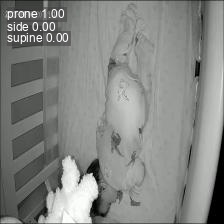

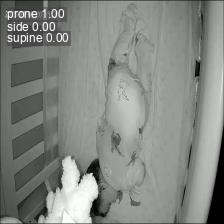

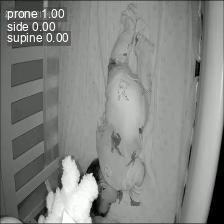

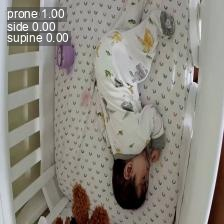

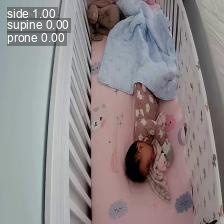

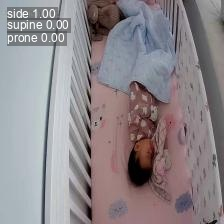

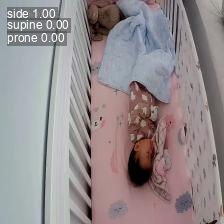

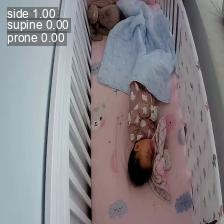

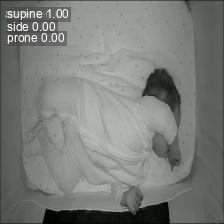

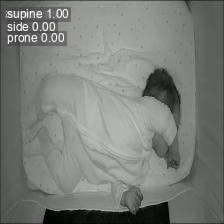

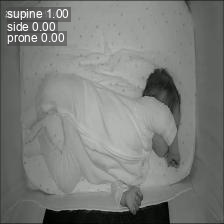

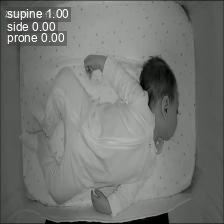

In [27]:
from ultralytics import YOLO
import glob
from IPython.display import Image as IPyImage, display
import os

# Load best model
model = YOLO("/content/drive/My Drive/resp-rr-estimation/air125_pose_model2/weights/best.pt")

# Pick some test images from each class
test_dir = "/content/drive/My Drive/resp-rr-estimation/air125_dataset/test"
sample_images = []

# Get a few 'prone' images
prone_images = glob.glob(os.path.join(test_dir, "prone", "*.jpg"))[:4]
sample_images.extend(prone_images)

# Get a few 'side' images
side_images = glob.glob(os.path.join(test_dir, "side", "*.jpg"))[:4]
sample_images.extend(side_images)

# Get a few 'supine' images
supine_images = glob.glob(os.path.join(test_dir, "supine", "*.jpg"))[:4]
sample_images.extend(supine_images)

# Predict and save
results = model.predict(
    source=sample_images,
    save=True,
    project="/content/drive/My Drive/resp-rr-estimation",
    name="air125_pose_predictions_all_classes", # Changed name to avoid overwriting
    imgsz=224
)

# Show a few saved prediction images
pred_dir = "/content/drive/My Drive/resp-rr-estimation/air125_pose_predictions_all_classes"
# Ensure the prediction directory exists before trying to list its contents
if os.path.exists(pred_dir):
    for p in glob.glob(pred_dir + "/*.jpg")[:min(len(sample_images), 12)]: # Show up to 12 images, capped by available samples
        display(IPyImage(filename=p))
else:
    print(f"Prediction directory not found: {pred_dir}")


In [46]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/My Drive/resp-rr-estimation')
video_path = "Baby_test.mp4"


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [47]:
import cv2
import os

frames_dir = "video_frames"
os.makedirs(frames_dir, exist_ok=True)

cap = cv2.VideoCapture(video_path)
fps = cap.get(cv2.CAP_PROP_FPS)
step = int(fps)  # 1 frame/sec

i = 0
saved = 0
while True:
    ret, frame = cap.read()
    if not ret:
        break
    if i % step == 0:
        out_path = os.path.join(frames_dir, f"frame_{saved:05d}.jpg")
        cv2.imwrite(out_path, frame)
        saved += 1
    i += 1

cap.release()
print("Saved frames:", saved)


Saved frames: 0


In [44]:
from ultralytics import YOLO
import glob

model = YOLO("/content/drive/My Drive/resp-rr-estimation/air125_pose_model2/weights/best.pt")

frame_paths = sorted(glob.glob(os.path.join(frames_dir, "*.jpg")))

results = model.predict(
    source=frame_paths,
    imgsz=224,
    save=True,  # saves labeled frames
    project="/content/drive/My Drive/resp-rr-estimation",
    name="video_pose_predictions",
    verbose=False
)


Results saved to /content/drive/My Drive/resp-rr-estimation/video_pose_predictions2


In [45]:
import numpy as np
from pathlib import Path

class_names = ['prone', 'side', 'supine']

pred_labels = []
pred_confs = []
frame_ids = []

for r in results:
    top_idx = int(r.probs.top1)
    pred_labels.append(class_names[top_idx])
    pred_confs.append(float(r.probs.top1conf))
    frame_ids.append(Path(r.path).stem)

for f, lab, c in zip(frame_ids[:20], pred_labels[:20], pred_confs[:20]):
    print(f"{f}: {lab} ({c:.2f})")

# Overall pose distribution in the video
from collections import Counter
print("Pose counts:", Counter(pred_labels))


frame_00000: side (1.00)
frame_00001: side (1.00)
frame_00002: side (1.00)
frame_00003: side (1.00)
frame_00004: side (1.00)
frame_00005: side (1.00)
frame_00006: side (1.00)
frame_00007: side (1.00)
Pose counts: Counter({'side': 8})


In [48]:
import os, cv2

video_path = "/content/drive/My Drive/resp-rr-estimation/baby_test.mp4"
frames_dir = "/content/drive/My Drive/resp-rr-estimation/baby_test_frames"
os.makedirs(frames_dir, exist_ok=True)

cap = cv2.VideoCapture(video_path)
fps = cap.get(cv2.CAP_PROP_FPS)
step = int(max(fps, 1))   # ~1 frame per second

i = 0
saved = 0
while True:
    ret, frame = cap.read()
    if not ret:
        break
    if i % step == 0:
        out_path = os.path.join(frames_dir, f"frame_{saved:05d}.jpg")
        cv2.imwrite(out_path, frame)
        saved += 1
    i += 1

cap.release()
print("Saved frames:", saved)


Saved frames: 11


In [49]:
from ultralytics import YOLO
import glob
from collections import Counter

model = YOLO("/content/drive/My Drive/resp-rr-estimation/air125_pose_model2/weights/best.pt")
frame_paths = sorted(glob.glob(frames_dir + "/*.jpg"))

results = model.predict(
    source=frame_paths,
    imgsz=224,
    save=True,
    project="/content/drive/My Drive/resp-rr-estimation",
    name="baby_test_predictions",
    verbose=False
)

class_names = ['prone', 'side', 'supine']
labels = []

for r in results:
    top_idx = int(r.probs.top1)
    labels.append(class_names[top_idx])

print("Pose counts in baby_test.mp4:", Counter(labels))


Results saved to /content/drive/My Drive/resp-rr-estimation/baby_test_predictions
Pose counts in baby_test.mp4: Counter({'side': 11})


In [51]:
import os, cv2

video_path = "/content/drive/My Drive/resp-rr-estimation/baby_supine.mp4"
frames_dir = "/content/drive/My Drive/resp-rr-estimation/baby_supine_frames"
os.makedirs(frames_dir, exist_ok=True)

cap = cv2.VideoCapture(video_path)
fps = cap.get(cv2.CAP_PROP_FPS)
step = int(max(fps, 1))   # ~1 frame per second

i = 0
saved = 0
while True:
    ret, frame = cap.read()
    if not ret:
        break
    if i % step == 0:
        out_path = os.path.join(frames_dir, f"frame_{saved:05d}.jpg")
        cv2.imwrite(out_path, frame)
        saved += 1
    i += 1

cap.release()
print("Saved frames:", saved)


Saved frames: 8


In [52]:
from ultralytics import YOLO
import glob
from collections import Counter

model = YOLO("/content/drive/My Drive/resp-rr-estimation/air125_pose_model2/weights/best.pt")

frame_paths = sorted(glob.glob(frames_dir + "/*.jpg"))

results = model.predict(
    source=frame_paths,
    imgsz=224,
    save=True,   # saves labeled frames
    project="/content/drive/My Drive/resp-rr-estimation",
    name="baby_supine_predictions",
    verbose=False
)

class_names = ['prone', 'side', 'supine']
labels = []

for r in results:
    top_idx = int(r.probs.top1)
    labels.append(class_names[top_idx])

print("Pose counts in baby_supine.mp4:", Counter(labels))


Results saved to /content/drive/My Drive/resp-rr-estimation/baby_supine_predictions
Pose counts in baby_supine.mp4: Counter({'side': 8})
